# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%pylab inline

sns.set()
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (12, 8)

np.random.seed(42)

Populating the interactive namespace from numpy and matplotlib


In [14]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

In [15]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [16]:
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It's a good idea to check to see if we have any missing values..

In [17]:
df = data[['race', 'call']]
all(pd.notnull(df))

True

With that, let's proceed with exploring the data.

In [18]:
n_c = np.sum(data.call)
n = len(data)
# p = r/n
w = data[data.race == 'w']
b = data[data.race == 'b']

# white-sounding names
w_c = np.sum(w.call)
w_n = len(w)
w_p = (w_c / w_n)

# black-sounding names
b_c = np.sum(b.call)
b_n = len(b)
b_p = (b_c / b_n)

df = {'CallBack': np.array([w_c, b_c, n_c]).astype(int),
      'No CallBack': np.array([w_n - w_c, b_n - b_c, n - n_c]).astype(int),
      'Total': np.array([w_n, b_n, n]).astype(int),
      'Success Rate': np.array(['{:.2%}'.format(w_c/w_n), '{:.2%}'.format(b_c/b_n), '{:.2%}'.format(n_c/n)])}

tbl = pd.DataFrame(df, columns = ['CallBack', 'No CallBack', 'Total', 'Success Rate'], 
                   index = ['White-sounding names', 'Black-sounding names', 'Total'])
tbl

,CallBack,No CallBack,Total,Success Rate
White-sounding names,235,2200,2435,9.65%
Black-sounding names,157,2278,2435,6.45%
Total,392,4478,4870,8.05%


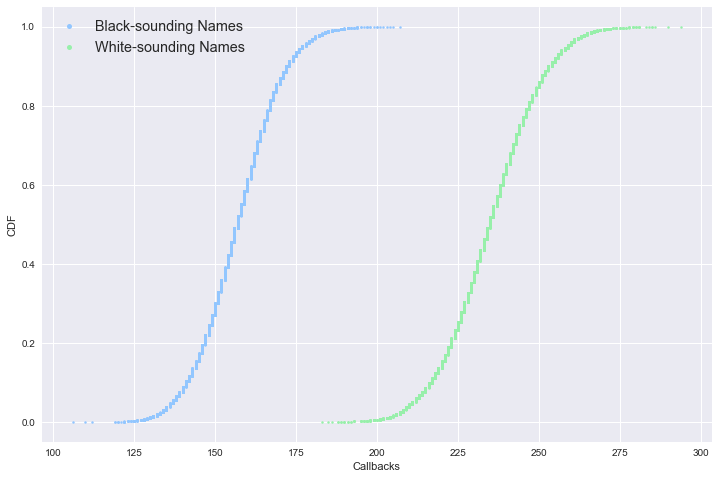

In [19]:
# plot a cumulative distribution function of data
blacks = np.random.binomial(b_n, b_p, size = 10000)
bx, by = ecdf(blacks)
_ = plt.plot(bx, by, markersize = 5, marker='.', linestyle='none')

whites = np.random.binomial(w_n, w_p, size = 10000)
wx, wy = ecdf(whites)
_ = plt.plot(wx, wy, markersize = 5, marker='.', linestyle='none')

plt.margins = 0.02

_ = xlabel('Callbacks')
_ = ylabel('CDF')
_ = legend(('Black-sounding Names', 'White-sounding Names'), fontsize = 'large', markerscale = 2)

### 1. What test is appropriate for this problem? Does CLT Apply? ###

We are interested in understanding the callback rates for the resumes of two populations: black-sounding names (6.45%) and white-sounding names (9.65%). The data suggest a 3.20% difference in success rates between the two groups and we want to determine if this difference is statistically significant.

We will use the **two-sample z-test for the difference between proportions** to compare whether or not resumes with black-sounding names and white-sounding names are the same. In order to use this test, three conditions must be met:

1. The samples must be independent.
2. The samples must be large enough to use a normal sampling distribution.
3. The samples must be randomly selected.

When these conditions are met, the sampling distribution for the difference between the sample proportions ( $\hat p_1 - \hat p_2$ ) is a normal distribution. 

Our test statistic is $\hat p_1 - \hat p_2$, and the standardized test statistic is:

$$z = \frac{(\hat p_1 - \hat p_2) - (p_1 - p_2)}{\sqrt{\bar p\bar q \left(\frac{1}{n_1}+\frac{1}{n_2}\right)}}$$

where
$$\bar p = \frac{x_1 + x_2}{n_1 + n_2}$$ and $$\bar q = 1 - \bar p$$


"Large enough" is decribed by:

 - $n_1p_1 \ge 5$
 - $n_2p_2 \ge 5$  
 - $n_1q_1 \ge 5$       
 - $n_2q_2 \ge 5$ 

Notation descriptions:
$p_1, p_2$ : population proportions; $n_1, n_2$ : size of each sample; $x_1, x_2$ : number of successes in each sample; $\hat p_1, \hat p_2$ : sample proportions of successes; $\bar p$ : weighted estimate for $p_1, p_2$

The confidence interval is given by:

$$(\hat p_1 - \hat p_2) \pm z*{\sqrt{\frac{\hat p_1(1 - \hat p_1)}{n_1} + \frac{\hat p_2(1-\hat p_2)}{n_2}}}$$


In [20]:
# Test the qualification of our sample data
print(b_n * b_p >= 5, w_n * w_p >= 5, b_n * (1 - b_p) >= 5, w_n * (1 - w_p) >= 5)

True True True True


We confirm that the sample data are large enough to use a normal sampling distribution and we may proceed with testing the difference between proportions.

### 2. What are the null and alternate hypotheses? ###

</p> **Null Hypothesis**: Resumes with white-sounding names and black-sounding names have an equal probability of receiving a callback.   </p>

</p>$$H_o: \widehat p_w - \widehat p_b = 0$$</p>

</p> **Alternate Hypothesis**: Resumes with white-sounding names and black-sounding names **do not** have an equal probability of receiving a callback.    </p>

</p>$$H_a: \widehat p_w - \widehat p_b \neq 0$$</p>

For this analysis, the significance level (**$\alpha$**) is **0.05** and the critical value **$z_o$** is **1.96**. 


###    3. Margin of error, confidence interval, and p-value ###

#### Bootstrap ####

In [21]:
proportion_diff = w_p - b_p # compute the difference between proportions

# Construct arrays of data: white-sounding names, black-sounding names
total_cb = np.array([True] * int(n_c) + [False] * int(n-n_c))

size = 10000
bs_repdiff = np.empty(size) # initiate empty array
for i in range(size):
    b_bsreps = np.sum(np.random.choice(total_cb, size = b_n))
    w_bsreps = np.sum(np.random.choice(total_cb, size = w_n))
    bs_repdiff[i] = (w_bsreps - b_bsreps) / b_n
    
bs_p_value = np.sum(bs_repdiff >= proportion_diff) / len(bs_repdiff)
bs_ci = np.percentile(bs_repdiff, [2.5, 97.5]) # compute 95% confidence interval
bs_diff = np.max(bs_repdiff)

print('bootstrap proportions difference: {:0.4}'.format(bs_diff*100))
print('p-value: {:0.4}\n95% conf. int.: {}'.format(bs_p_value, bs_ci))

bootstrap proportions difference: 2.957
p-value: 0.0
95% conf. int.: [-0.01560575  0.01560575]


#### Frequentist Approach

In [22]:
z_crit = 1.96
# We can compute the confidence interval by plugging our empirical data 
# into the confidence interval equation (see question 1) 
wsn = w_p*(1 - w_p)/w_n # left side of square root
bsn = b_p*(1 - b_p)/b_n # right side of square root
ci_hi = proportion_diff + z_crit*(np.sqrt(wsn + bsn))
ci_lo = proportion_diff - z_crit*(np.sqrt(wsn + bsn))

# run z-test for proportions available in statsmodel.stats
z_score, p_value = sm.stats.proportions_ztest([w_c, b_c], [w_n, b_n])
print('z-score: \t {:0.4}\np-value: \t {:0.4}'.format(z_score, p_value))

print('95% conf int: \t {:0.4} - {:0.4}'.format(ci_lo, ci_hi))

err_mar = (ci_hi - ci_lo)/2
print('Margin of err: \t +/- {}'.format(err_mar))

z-score: 	 4.108
p-value: 	 3.984e-05
95% conf int: 	 0.01678 - 0.04729
Margin of err: 	 +/- 0.015255406349886438


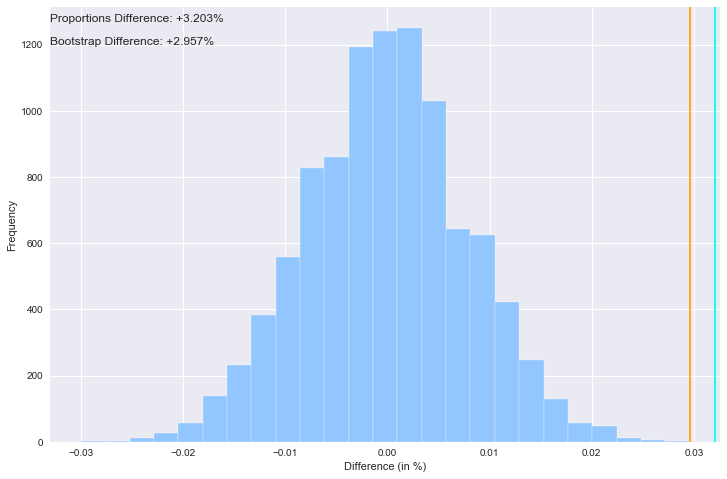

In [23]:
_ = hist(bs_repdiff, bins = 25, edgecolor = 'white')
_ = axvline(proportion_diff, color = 'cyan')
_ = axvline(bs_diff, color = 'orange')
_ = xlabel('Difference (in %)')
_ = ylabel('Frequency')
_ = text(-0.033, 1200, 'Proportions Difference: +{:0.4}% \n\nBootstrap Difference: +{:0.4}%'.format(proportion_diff*100, bs_diff*100))

#### 4. Write a story describing the statistical significance in the context or the original problem.

This analysis looks at the level of racial discrimination in the US labor market using data from a study in which researchers randomly assigned indentical resumes black-sounding or white-sounding names and observed the impact on interview requests by employers. Of a total of 4870 resumes that were evenly divided between the two groups, 392 received callbacks, of which 157 had black-sounding names and 235 had white-sounding names. The 3.2% difference in success rates of black (6.45%) and white (9.65%) names was found to be statistically signicant; resumes with white-sounding names and black-sounding names do NOT have an equal probability of receiving a callback. To arrive at this conclusion, we carried out a two-sample z-test for difference in proportions and found the p-value to be 0.00, far below our significance level of 0.05 in both bootstrap and frequentist analyses, and a z-score of 4.108 which exceeds the critical value of 1.96. 

#### 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

This analysis does not necessarily suggest that race/name is the most important factor in callback success but rather that it is a factor. There are many variables such as professional experience, education, accomplishments, location, etc. that were not considered in this analysis. In order to determine whether race/name is the most important factor, it is necessary to perform an analysis on each factor independently and compare their effect on callback success.